In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_theme(style="darkgrid")

In [3]:
df = pd.read_csv('hourly_summary.csv')
df.head()

,Date,Hour,Temperature_C,Wind_Speed_kmh,MW,Total_Emissions,Carbon_Intensity_g_kWh
0,2020-01-01,1,-1.7,22.7,16547,114190.0,6.900949
1,2020-01-01,2,-1.6,22.1,16173,113610.0,7.024671
2,2020-01-01,3,-1.5,21.8,16027,114560.0,7.147938
3,2020-01-01,4,-1.7,20.7,15912,114560.0,7.199598
4,2020-01-01,5,-1.8,20.2,16023,113580.0,7.088560


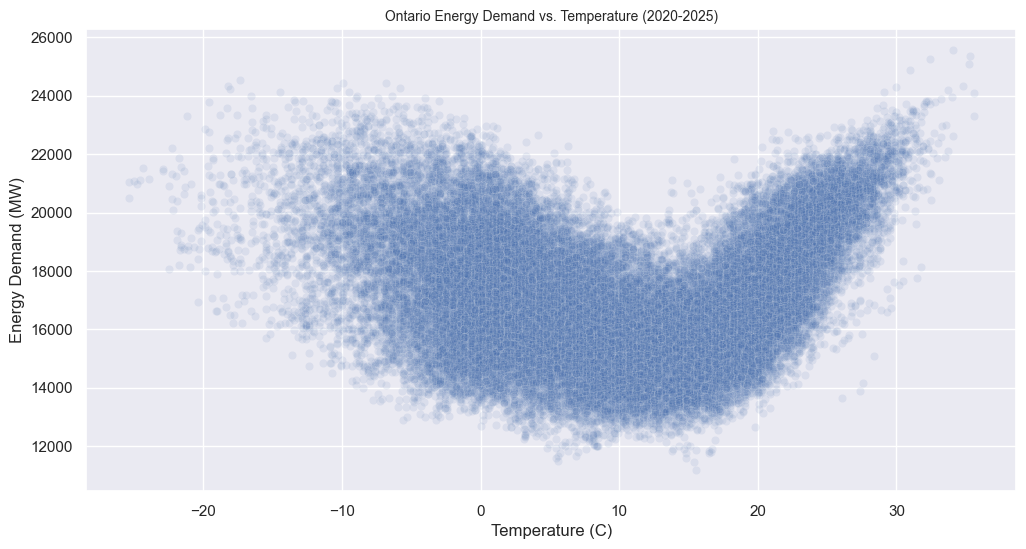

In [4]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Temperature_C', y='MW', alpha=0.1)

plt.title('Ontario Energy Demand vs. Temperature (2020-2025)', fontsize=10)
plt.xlabel('Temperature (C)', fontsize=12)
plt.ylabel('Energy Demand (MW)', fontsize=12)

plt.show()

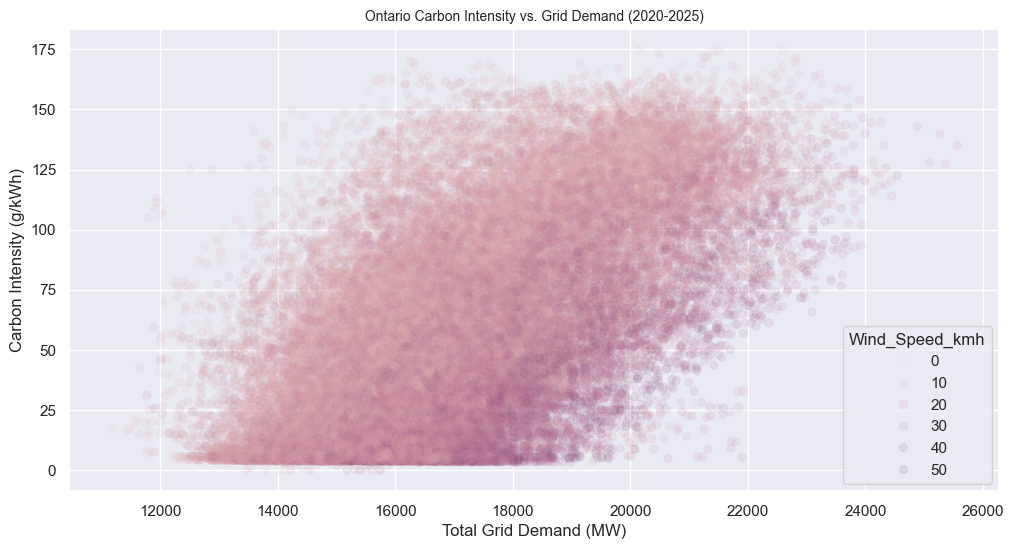

In [5]:
plt.figure(figsize=(12, 6))

sns.scatterplot(
    data=df,
    x='MW',
    y='Carbon_Intensity_g_kWh',
    hue='Wind_Speed_kmh',
    alpha=0.1,
    color='red',
    edgecolor=None
)

plt.title('Ontario Carbon Intensity vs. Grid Demand (2020-2025)', fontsize=10)
plt.xlabel('Total Grid Demand (MW)', fontsize=12)
plt.ylabel('Carbon Intensity (g/kWh)', fontsize=12)

plt.show()

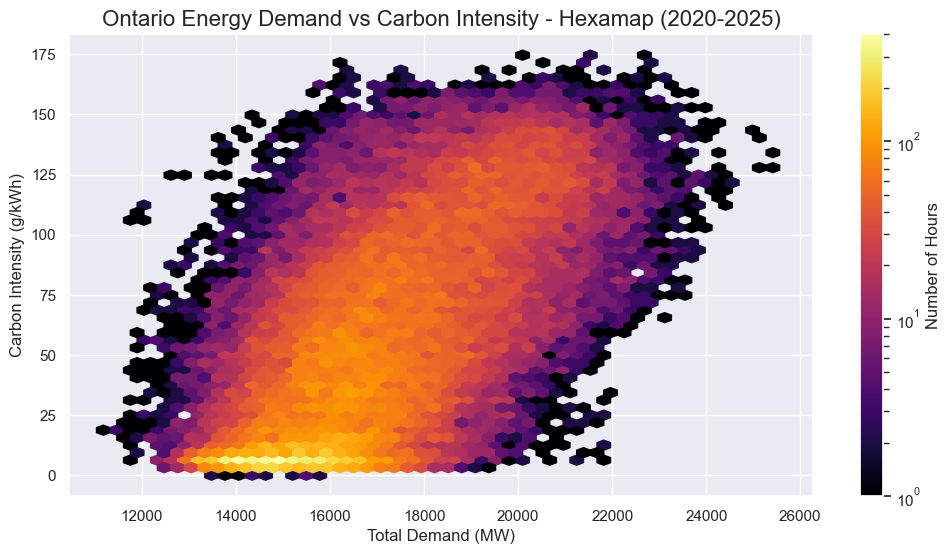

In [55]:
plt.figure(figsize=(12, 6))

# Hexbin is the "High Performance" version of a density plot
plt.hexbin(
    df['MW'],
    df['Carbon_Intensity_g_kWh'],
    cmap='inferno',
    gridsize=50,
    mincnt=1,
    bins='log'
)

cb = plt.colorbar(label='Number of Hours')
plt.title('Ontario Energy Demand vs Carbon Intensity - Hexamap (2020-2025)', fontsize=16)
plt.xlabel('Total Demand (MW)')
plt.ylabel('Carbon Intensity (g/kWh)')
plt.show()

In [7]:
master_energy = pd.read_csv('master_energy_history_with_weather.csv')
master_energy.head()

,Date,Hour,Fuel,MW,Temperature_C,Wind_Speed_kmh
0,2020-01-01,1,NUCLEAR,11633,-1.7,22.7
1,2020-01-01,1,GAS,232,-1.7,22.7
2,2020-01-01,1,HYDRO,2948,-1.7,22.7
3,2020-01-01,1,WIND,1717,-1.7,22.7
4,2020-01-01,1,SOLAR,0,-1.7,22.7


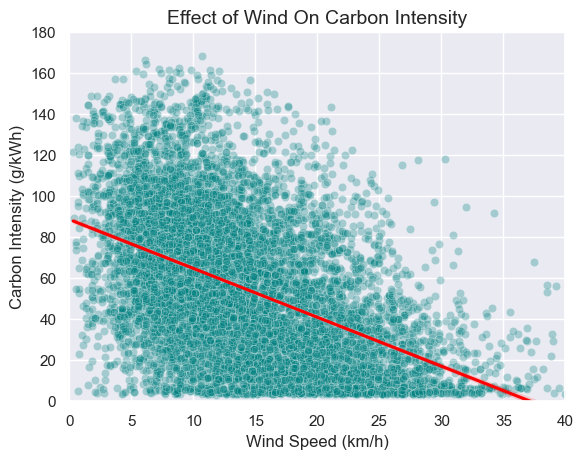

In [61]:
splice = df[(df['MW'] > 16500) & (df['MW'] < 17500)]

sns.scatterplot(
    data=splice,
    x='Wind_Speed_kmh',
    y='Carbon_Intensity_g_kWh',
    alpha=0.3,
    color='teal'
)

sns.regplot(
    data=splice,
    x='Wind_Speed_kmh',
    y='Carbon_Intensity_g_kWh',
    scatter=False,
    color='red'
)

plt.title('Effect of Wind On Carbon Intensity', fontsize=14)
plt.xlabel('Wind Speed (km/h)')
plt.ylabel('Carbon Intensity (g/kWh)')

plt.xlim(0, 40)
plt.ylim(0, 180)

plt.show()